In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
save_dir = "/content/drive/MyDrive/sentiment_analysis"
os.makedirs(save_dir, exist_ok=True)

In [ ]:
import keras
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/sentiment_analysis/data/sentiment_data.txt", ";")
data.columns = ["text", "emotion"]
data.head()

<ipython-input-4-59446a3b7786>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  data = pd.read_csv("/content/drive/MyDrive/sentiment_analysis/data/sentiment_data.txt", ";")


,text,emotion
0,i can go from feeling so hopeless to so damned...,sadness
1,im grabbing a minute to post i feel greedy wrong,anger
2,i am ever feeling nostalgic about the fireplac...,love
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


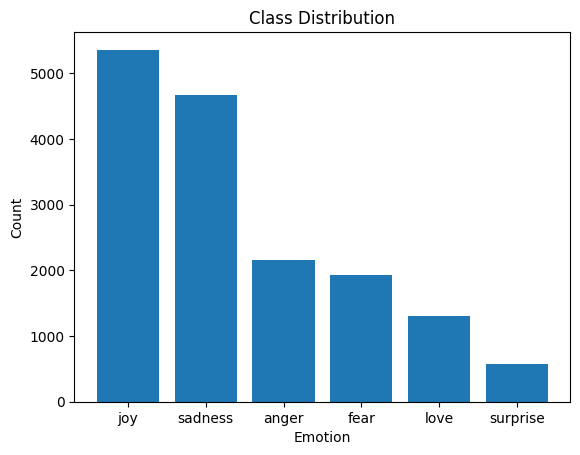

joy         33.514595
sadness     29.158072
anger       13.494593
fear        12.107007
love         8.150509
surprise     3.575223
Name: emotion, dtype: float64


In [ ]:
class_counts = data['emotion'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

class_distribution = class_counts / len(data) * 100
print(class_distribution)

In [ ]:
# Tokenization
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(data["text"])

# Sequencing
sequences = tokenizer.texts_to_sequences(data["text"])
word_index = tokenizer.word_index

# Padding
max_len = np.max(list(map(len, sequences)))
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

print("\nword_index = ", word_index)
print("\nsequences = ", sequences)
print("\npadded_seq = " )
print(padded_sequences)


word_index =  {'<OOV>': 1, 'i': 2, 'feel': 3, 'and': 4, 'to': 5, 'the': 6, 'a': 7, 'feeling': 8, 'that': 9, 'of': 10, 'my': 11, 'in': 12, 'it': 13, 'like': 14, 'so': 15, 'for': 16, 'im': 17, 'me': 18, 'but': 19, 'was': 20, 'have': 21, 'is': 22, 'this': 23, 'am': 24, 'with': 25, 'not': 26, 'about': 27, 'be': 28, 'as': 29, 'on': 30, 'you': 31, 'just': 32, 'at': 33, 'when': 34, 'or': 35, 'all': 36, 'because': 37, 'more': 38, 'do': 39, 'can': 40, 'really': 41, 'up': 42, 't': 43, 'are': 44, 'by': 45, 'very': 46, 'know': 47, 'been': 48, 'if': 49, 'out': 50, 'myself': 51, 'time': 52, 'how': 53, 'what': 54, 'get': 55, 'little': 56, 'had': 57, 'now': 58, 'will': 59, 'from': 60, 'being': 61, 'they': 62, 'people': 63, 'them': 64, 'would': 65, 'he': 66, 'want': 67, 'her': 68, 'some': 69, 'think': 70, 'one': 71, 'still': 72, 'ive': 73, 'him': 74, 'even': 75, 'who': 76, 'an': 77, 'life': 78, 'its': 79, 'make': 80, 'there': 81, 'we': 82, 'bit': 83, 'something': 84, 'love': 85, 'much': 86, 'going': 8

In [ ]:
# First we convert string labels to numerical values, and then perform One-hot encoding
from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()
encoded_labels = encoder.fit_transform(data['emotion'])

one_hot_labels = keras.utils.to_categorical(encoded_labels)
one_hot_labels

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(padded_sequences, one_hot_labels, test_size=0.2)

In [ ]:
from keras import regularizers

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=len(word_index) + 1, output_dim=64, input_length=max_len))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(len(one_hot_labels[0]), activation=tf.nn.softmax))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
400/400 [==============================] - 50s 112ms/step - loss: 1.2824 - accuracy: 0.4977 - val_loss: 0.7348 - val_accuracy: 0.7244
Epoch 2/10
400/400 [==============================] - 44s 110ms/step - loss: 0.4938 - accuracy: 0.8298 - val_loss: 0.3793 - val_accuracy: 0.8809
Epoch 3/10
400/400 [==============================] - 48s 120ms/step - loss: 0.2335 - accuracy: 0.9202 - val_loss: 0.2902 - val_accuracy: 0.9031
Epoch 4/10
400/400 [==============================] - 45s 113ms/step - loss: 0.1515 - accuracy: 0.9505 - val_loss: 0.2962 - val_accuracy: 0.9056
Epoch 5/10
400/400 [==============================] - 43s 108ms/step - loss: 0.1115 - accuracy: 0.9651 - val_loss: 0.2971 - val_accuracy: 0.9069
Epoch 6/10
400/400 [==============================] - 46s 114ms/step - loss: 0.0830 - accuracy: 0.9719 - val_loss: 0.3243 - val_accuracy: 0.9075
Epoch 7/10
400/400 [==============================] - 43s 109ms/step - loss: 0.0753 - accuracy: 0.9770 - val_loss: 0.3284 - val_ac

In [ ]:
model.save(os.path.join(save_dir, 'sentiment_model'))

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/sentiment_analysis/sentiment_model')

In [ ]:
input_text = "She didn't come today because she lost her dog yestertay!"

input_sequence = tokenizer.texts_to_sequences([input_text])
padded_input_sequence = tf.keras.preprocessing.sequence.pad_sequences(input_sequence, maxlen=max_len)
prediction = model.predict(padded_input_sequence)
predicted_label_encoded = np.argmax(prediction[0])
predicted_label = encoder.inverse_transform([predicted_label_encoded])
print(predicted_label)

1/1 [==============================] - 1s 864ms/step
['sadness']
